In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
dir_path = r"C:\Users\leere\OneDrive\Documents\Trading and Betting\Trackers\BF Bot Manager Monthly Records\ALL"

csv_files = []

for root, dirs, files in os.walk(dir_path):
    for file in files:
        if file.lower().endswith(".csv"):
            csv_files.append(os.path.join(root, file))

if not csv_files:
    raise FileNotFoundError(f"No CSV files found under: {dir_path}")

df_list = []
failed_files = []

for file in csv_files:
    try:
        # Try UTF-8 first
        df = pd.read_csv(file, encoding="utf-8")
    except UnicodeDecodeError:
        try:
            # Fallback to Windows cp1252
            df = pd.read_csv(file, encoding="cp1252")
        except UnicodeDecodeError:
            # As a last resort, read and ignore bad bytes
            try:
                df = pd.read_csv(file, encoding="latin1", encoding_errors="ignore")
            except Exception as e:
                print(f"Failed to read {file}: {e}")
                failed_files.append(file)
                continue

    df["source_file"] = os.path.basename(file)
    df_list.append(df)

if not df_list:
    raise RuntimeError("No CSVs could be read successfully.")

combined_df = pd.concat(df_list, ignore_index=True)

print(f"Total CSV files found      : {len(csv_files)}")
print(f"Successfully loaded files  : {len(df_list)}")
print(f"Failed files               : {len(failed_files)}")
if failed_files:
    print("Failed file list:")
    for f in failed_files:
        print("  ", f)



Total CSV files found      : 51
Successfully loaded files  : 51
Failed files               : 0


In [3]:
goals = combined_df[combined_df['Strategy']=="2H GOAL ML ALL"]
goals

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,source_file,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Number of selections
282319,12:30 West Brom v Sheff Wed\Over/Under 0.5 Goa...,Under 0.5 Goals,LAY,£0.05,5.2,SETTLED,-£0.21,2H GOAL ML ALL,2025-11-01 13:26:42,2025-11-01 14:25:04,NaN,NaN,NaN,November 2025.csv,£0.00,NaN,NaN,NaN,NaN,NaN
282320,14:00 NK Bravo v NK Maribor\Over/Under 3.5 Goa...,Under 3.5 Goals,LAY,£0.10,6.0,SETTLED,£0.10,2H GOAL ML ALL,2025-11-01 14:58:26,2025-11-01 15:15:25,NaN,NaN,NaN,November 2025.csv,£0.05,NaN,NaN,NaN,NaN,NaN
282321,14:30 RB Leipzig v Stuttgart\Over/Under 1.5 Go...,Under 1.5 Goals,LAY,£0.10,8.0,SETTLED,£0.10,2H GOAL ML ALL,2025-11-01 15:26:59,2025-11-01 15:42:23,NaN,NaN,NaN,November 2025.csv,£0.05,NaN,NaN,NaN,NaN,NaN
282322,14:30 St Pauli v Mgladbach\Over/Under 2.5 Goal...,Under 2.5 Goals,LAY,£0.10,5.2,SETTLED,£0.10,2H GOAL ML ALL,2025-11-01 15:28:15,2025-11-01 16:06:49,NaN,NaN,NaN,November 2025.csv,£0.05,NaN,NaN,NaN,NaN,NaN
282323,14:30 Tatran Presov v Zilina\Over/Under 1.5 Go...,Under 1.5 Goals,LAY,£0.10,5.4,SETTLED,£0.10,2H GOAL ML ALL,2025-11-01 15:28:16,2025-11-01 16:01:10,NaN,NaN,NaN,November 2025.csv,£0.05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310042,19:45 Genoa v Lazio\Over/Under 2.5 Goals\Under...,Under 2.5 Goals,LAY,£1.14,3.4,SETTLED,£1.14,2H GOAL ML ALL,2025-09-29 20:40:59,2025-09-29 21:07:36,NaN,NaN,NaN,September 2025.csv,£1.04,0.0,NaN,NaN,NaN,2.0
310043,19:00 VVV Venlo v Den Bosch\Over/Under 0.5 Goa...,Under 0.5 Goals,LAY,£0.58,6.2,SETTLED,£0.58,2H GOAL ML ALL,2025-09-30 19:57:54,2025-09-30 20:37:38,NaN,NaN,NaN,September 2025.csv,£0.48,0.0,NaN,NaN,NaN,2.0
310044,19:00 Jong FC Utrecht v Jong AZ Alkmaar\Over/U...,Under 0.5 Goals,LAY,£0.68,5.3,SETTLED,-£2.92,2H GOAL ML ALL,2025-09-30 19:58:22,2025-09-30 20:56:47,NaN,NaN,NaN,September 2025.csv,£0.58,0.0,NaN,NaN,NaN,2.0
310045,19:45 Cardiff v Burton Albion\Over/Under 0.5 G...,Under 0.5 Goals,LAY,£0.55,6.6,SETTLED,£0.55,2H GOAL ML ALL,2025-09-30 20:41:22,2025-09-30 21:26:05,NaN,NaN,NaN,September 2025.csv,£0.45,0.0,NaN,NaN,NaN,2.0


In [4]:
# make a numeric copy of the column
goals['PL_num'] = (
    goals['P/L']
    .str.strip()                # remove any leading/trailing spaces
    .str.replace('£', '', regex=False)  # drop the pound sign
    .astype(float)              # convert to float, "-" is handled automatically
)

non_zero = goals['PL_num'] != 0
strike_rate = (goals.loc[non_zero, 'PL_num'] > 0).mean()
print(f"Strike rate (excluding 0 P/L): {strike_rate:.2%}")


Strike rate (excluding 0 P/L): 84.64%


C:\Users\leere\AppData\Local\Temp\ipykernel_11204\4090483574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals['PL_num'] = (


In [5]:
# goals is your existing DataFrame
# Make sure the column is numeric and filter out prices > 2.5
goals['Avg. price matched'] = pd.to_numeric(
    goals['Avg. price matched'], errors='coerce'
)

historical_odds = (
    goals.loc[
        goals['Avg. price matched'].notna()
        & (goals['Avg. price matched'] <= 8),
        'Avg. price matched'
    ]
    .values
)
historical_odds

C:\Users\leere\AppData\Local\Temp\ipykernel_11204\1827113368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals['Avg. price matched'] = pd.to_numeric(


array([5.2 , 6.  , 8.  , 5.2 , 5.4 , 4.6 , 5.2 , 5.6 , 6.2 , 6.2 , 7.4 ,
       7.8 , 6.4 , 7.4 , 6.2 , 4.8 , 3.5 , 7.8 , 7.8 , 5.6 , 6.4 , 4.9 ,
       5.  , 7.  , 4.7 , 5.2 , 7.2 , 5.8 , 4.8 , 6.4 , 7.8 , 5.6 , 5.1 ,
       8.  , 5.9 , 7.2 , 5.7 , 7.8 , 7.  , 5.  , 7.8 , 3.95, 8.  , 3.65,
       7.  , 6.  , 5.7 , 7.8 , 8.  , 6.4 , 7.8 , 6.2 , 6.8 , 6.2 , 4.5 ,
       5.4 , 5.6 , 4.8 , 5.8 , 6.2 , 5.1 , 3.95, 3.75, 5.5 , 6.6 , 6.2 ,
       7.  , 4.4 , 5.4 , 6.2 , 6.2 , 5.9 , 6.4 , 7.  , 5.4 , 4.8 , 5.4 ,
       7.  , 7.8 , 8.  , 6.4 , 7.  , 4.9 , 6.4 , 8.  , 4.7 , 5.3 , 4.9 ,
       6.8 , 5.9 , 6.2 , 5.9 , 8.  , 6.8 , 7.4 , 6.8 , 4.7 , 5.7 , 6.8 ,
       5.9 , 4.7 , 7.  , 4.6 , 5.6 , 4.9 , 6.2 , 5.8 , 6.  , 4.1 , 7.4 ,
       5.2 , 5.5 , 5.3 , 7.2 , 5.5 , 4.8 , 5.4 , 5.5 , 5.5 , 5.7 , 7.  ,
       6.4 , 5.3 , 5.2 , 7.8 , 4.7 , 7.4 , 7.  , 6.4 , 6.2 , 7.6 , 4.7 ,
       5.8 , 7.2 , 4.5 , 5.58, 4.4 , 6.4 , 8.  , 5.4 , 7.  , 4.9 , 6.2 ,
       6.  , 6.4 , 7.4 , 7.8 , 6.2 , 5.6 , 5.3 , 7.

Number of odds used: 333
First few odds: [5.2 6.  8.  5.2 5.4 4.6 5.2 5.6 6.2 6.2]


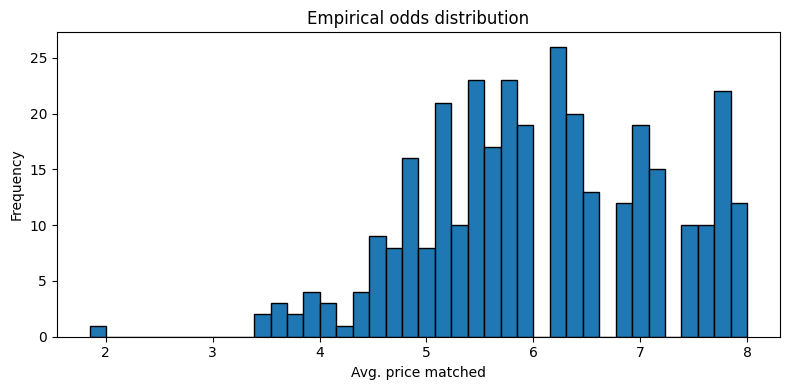

banks shape: (5000, 5001)


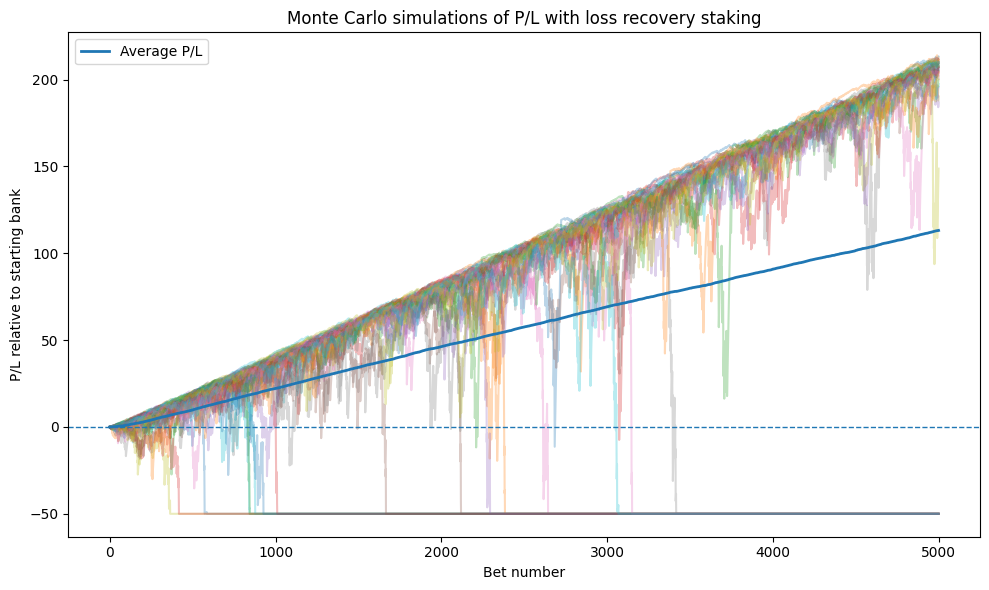

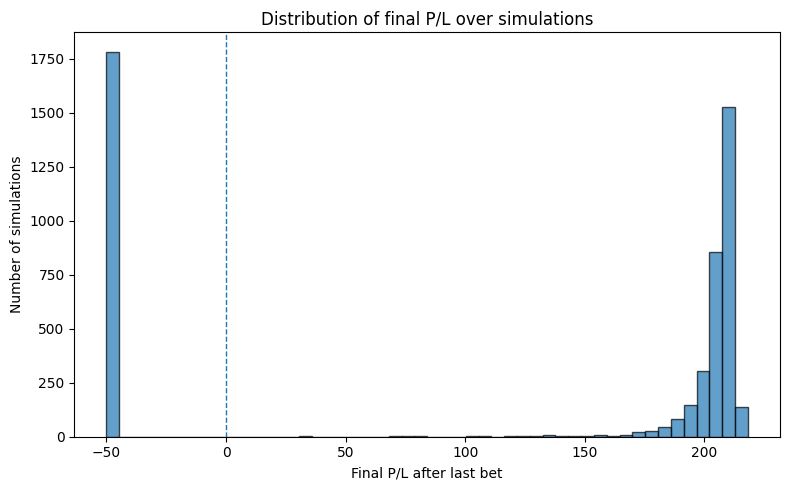


==== Baseline summary metrics (recovery_rate = 0.050) ====
                               0
n_sims               5000.000000
n_steps              5000.000000
start_bank             50.000000
mean_final_pl         113.101183
median_final_pl       202.330108
std_final_pl          122.250822
p5_final_pl           -50.000000
p25_final_pl          -50.000000
p50_final_pl          202.330108
p75_final_pl          208.877576
p95_final_pl          212.018312
prob_profit             0.642800
prob_loss               0.357200
prob_break_even         0.000000
prob_ruin_anytime       0.356600
mean_max_drawdown      81.736297
median_max_drawdown    68.163310
p5_max_drawdown        28.003581
p25_max_drawdown       49.538605
p50_max_drawdown       68.163310
p75_max_drawdown      101.870476
p95_max_drawdown      185.289819


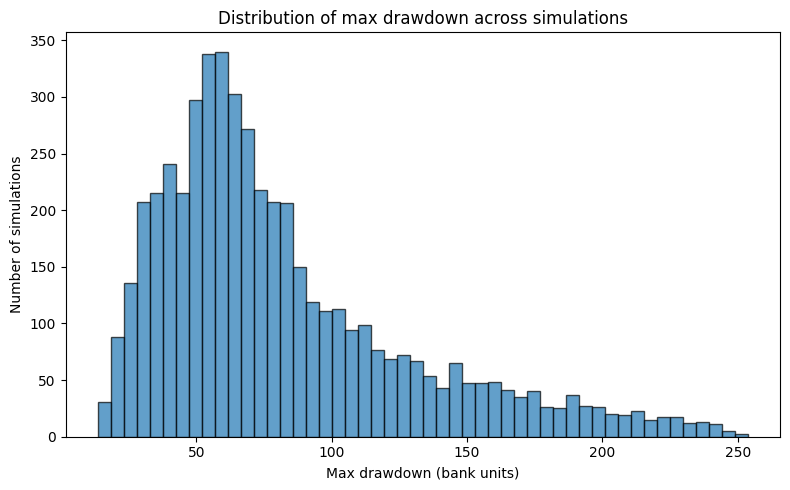


KeyboardInterrupt



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========================================================
# 1. Build empirical odds distribution from your DataFrame
# ========================================================

# If not already defined, build historical_odds from goals:
# (adjust column/filters if needed)

# goals['Avg. price matched'] = pd.to_numeric(
#     goals['Avg. price matched'], errors='coerce'
# )
# historical_odds = goals.loc[
#     goals['Avg. price matched'].notna()
#     & (goals['Avg. price matched'] <= 2.5),
#     'Avg. price matched'
# ].values

print("Number of odds used:", len(historical_odds))
print("First few odds:", historical_odds[:10])

plt.figure(figsize=(8, 4))
plt.hist(historical_odds, bins=40, edgecolor="black")
plt.xlabel("Avg. price matched")
plt.ylabel("Frequency")
plt.title("Empirical odds distribution")
plt.tight_layout()
plt.show()


# ========================================================
# 2. Core simulation with 'lock at max stake until recovered'
# ========================================================

def simulate_strategy(
    n_bets=1000,
    p_win=0.8615,
    base_stake=10.05,
    starting_bank=50.0,
    recovery_rate=0.5,      # fraction of loss pot you aim to recover per bet (before max_stake cap)
    amount_to_recover=1.0,  # usually 1.0 = 100% of loss pot is the target
    max_stake=None,         # absolute cap on total stake (base + recovery)
    include_losing_stakes_in_pot=False,
    constant_odds=None,
    min_odds=1.6,
    max_odds=2.2,
    odds_samples=None,      # empirical odds, e.g. historical_odds
    rng=None,
):
    """
    Overall loss-recovery staking with the following behaviour:

    - Maintain a loss_pot of accumulated losses.
    - On each bet, compute desired recovery stake:
         desired_recovery_stake = loss_pot * amount_to_recover * recovery_rate
      and add that on top of base_stake.
    - If total stake would exceed max_stake, cap it at max_stake and set
      hit_max = True.
    - Once we've hit max_stake while loss_pot > 0, we keep using max_stake
      (subject to bank) on every subsequent bet until loss_pot is fully cleared.
    - On a win, only the recovery portion of the stake is used to pay down
      loss_pot. Base stake profit is treated as new profit.
    """

    if rng is None:
        rng = np.random.default_rng()

    bank = starting_bank
    loss_pot = 0.0
    hit_max = False  # whether we've hit max_stake in recovery mode

    bank_history = [bank]
    stake_history = []
    odds_history = []

    if odds_samples is not None and len(odds_samples) == 0:
        raise ValueError("odds_samples is empty – check your DataFrame/column name.")

    for _ in range(n_bets):
        if bank <= 0:
            bank_history.append(bank)
            stake_history.append(0.0)
            odds_history.append(np.nan)
            continue

        # --- choose odds ---
        if odds_samples is not None:
            odds = float(rng.choice(odds_samples))
        elif constant_odds is not None:
            odds = float(constant_odds)
        else:
            odds = float(rng.triangular(min_odds, max_odds, max_odds))

        # --- staking: base + recovery ---
        desired_recovery_stake = loss_pot * amount_to_recover * recovery_rate

        if max_stake is None:
            # no explicit max stake
            recovery_stake = desired_recovery_stake
            stake = base_stake + recovery_stake
        else:
            available_for_recovery = max(0.0, max_stake - base_stake)

            if hit_max and loss_pot > 0:
                # already in "locked at max" mode
                stake = max_stake
                recovery_stake = max(0.0, stake - base_stake)
            else:
                # not yet locked: normal recovery but capped by max_stake
                recovery_stake = min(desired_recovery_stake, available_for_recovery)
                stake = base_stake + recovery_stake

                # if we’re effectively at max_stake while still in recovery mode,
                # lock in max_stake behaviour
                if stake >= max_stake and loss_pot > 0:
                    stake = max_stake
                    recovery_stake = max(0.0, stake - base_stake)
                    hit_max = True

        # --- enforce bank constraint ---
        liability = (odds - 1.0) * stake
        if liability > bank:
            scale = bank / liability
            stake *= scale
            recovery_stake *= scale
            liability = bank  # all-in

        # --- outcome of bet ---
        win = bool(rng.random() < p_win)

        if win:
            profit = stake
            bank += profit

            # only recovery portion clears loss_pot
            recovered = min(loss_pot, recovery_stake)
            loss_pot = max(0.0, loss_pot - recovered)

            # if fully recovered, unlock from max_stake mode
            if loss_pot <= 0:
                hit_max = False
        else:
            loss = liability
            bank -= loss
            add_loss = loss
            if include_losing_stakes_in_pot:
                add_loss += stake
            loss_pot += add_loss

        bank_history.append(bank)
        stake_history.append(stake)
        odds_history.append(odds)

    if len(bank_history) < n_bets + 1:
        last = bank_history[-1]
        bank_history.extend([last] * (n_bets + 1 - len(bank_history)))

    return np.array(bank_history), np.array(stake_history), np.array(odds_history)


def run_simulations(n_sims=5000, n_bets=528, seed=None, **kwargs):
    banks = np.zeros((n_sims, n_bets + 1), dtype=float)
    master_rng = np.random.default_rng(seed)

    for i in range(n_sims):
        path_rng = np.random.default_rng(master_rng.integers(0, 2**32 - 1))
        bank_hist, _, _ = simulate_strategy(n_bets=n_bets, rng=path_rng, **kwargs)
        banks[i, :] = bank_hist

    return banks


# ========================================================
# 3. Plotting
# ========================================================

def plot_pl_paths(banks, starting_bank=1000.0, max_paths_to_plot=50):
    n_sims, n_steps = banks.shape
    x = np.arange(n_steps)

    plt.figure(figsize=(10, 6))

    n_plot = min(max_paths_to_plot, n_sims)
    idx = np.random.choice(n_sims, n_plot, replace=False)
    for i in idx:
        plt.plot(x, banks[i] - starting_bank, alpha=0.3)

    mean_pl = banks.mean(axis=0) - starting_bank
    plt.plot(x, mean_pl, linewidth=2, label="Average P/L")

    plt.axhline(0.0, linestyle="--", linewidth=1)
    plt.xlabel("Bet number")
    plt.ylabel("P/L relative to starting bank")
    plt.title("Monte Carlo simulations of P/L with loss recovery staking")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_final_distribution(banks, starting_bank=1000.0, bins=50):
    final_pl = banks[:, -1] - starting_bank

    plt.figure(figsize=(8, 5))
    plt.hist(final_pl, bins=bins, edgecolor="black", alpha=0.7)
    plt.axvline(0.0, linestyle="--", linewidth=1)
    plt.xlabel("Final P/L after last bet")
    plt.ylabel("Number of simulations")
    plt.title("Distribution of final P/L over simulations")
    plt.tight_layout()
    plt.show()


# ========================================================
# 4. Metrics / risk statistics
# ========================================================

def compute_simulation_metrics(banks, starting_bank=1000.0):
    n_sims, n_steps = banks.shape

    final_bank = banks[:, -1]
    final_pl = final_bank - starting_bank

    prob_profit = (final_pl > 0).mean()
    prob_loss = (final_pl < 0).mean()
    prob_break_even = (final_pl == 0).mean()

    ruined = (banks <= 0).any(axis=1)
    prob_ruin = ruined.mean()

    running_max = np.maximum.accumulate(banks, axis=1)
    drawdowns = banks - running_max
    max_drawdown = drawdowns.min(axis=1)
    max_drawdown_mag = -max_drawdown

    pl_quantiles = np.percentile(final_pl, [5, 25, 50, 75, 95])
    dd_quantiles = np.percentile(max_drawdown_mag, [5, 25, 50, 75, 95])

    summary = {
        "n_sims": n_sims,
        "n_steps": n_steps - 1,
        "start_bank": starting_bank,

        "mean_final_pl": final_pl.mean(),
        "median_final_pl": np.median(final_pl),
        "std_final_pl": final_pl.std(),

        "p5_final_pl": pl_quantiles[0],
        "p25_final_pl": pl_quantiles[1],
        "p50_final_pl": pl_quantiles[2],
        "p75_final_pl": pl_quantiles[3],
        "p95_final_pl": pl_quantiles[4],

        "prob_profit": prob_profit,
        "prob_loss": prob_loss,
        "prob_break_even": prob_break_even,

        "prob_ruin_anytime": prob_ruin,

        "mean_max_drawdown": max_drawdown_mag.mean(),
        "median_max_drawdown": np.median(max_drawdown_mag),
        "p5_max_drawdown": dd_quantiles[0],
        "p25_max_drawdown": dd_quantiles[1],
        "p50_max_drawdown": dd_quantiles[2],
        "p75_max_drawdown": dd_quantiles[3],
        "p95_max_drawdown": dd_quantiles[4],
    }

    summary_df = pd.DataFrame([summary])

    per_path_df = pd.DataFrame({
        "final_bank": final_bank,
        "final_pl": final_pl,
        "ruined": ruined,
        "max_drawdown": max_drawdown_mag,
    })

    return summary_df, per_path_df


def plot_drawdown_distribution(per_path_df, bins=50):
    plt.figure(figsize=(8, 5))
    plt.hist(per_path_df["max_drawdown"], bins=bins, edgecolor="black", alpha=0.7)
    plt.xlabel("Max drawdown (bank units)")
    plt.ylabel("Number of simulations")
    plt.title("Distribution of max drawdown across simulations")
    plt.tight_layout()
    plt.show()


# ========================================================
# 5. Sweep recovery rates to compare profit vs risk
# ========================================================

def sweep_recovery_rates(
    recovery_rates,
    base_params,
    n_sims=3000,
    seed=42,
):
    rows = []
    for r in recovery_rates:
        params = dict(base_params)
        params["recovery_rate"] = float(r)

        banks = run_simulations(n_sims=n_sims, seed=seed, **params)
        summary_df, _ = compute_simulation_metrics(
            banks, starting_bank=params["starting_bank"]
        )

        row = summary_df.iloc[0].copy()
        row["recovery_rate"] = r
        rows.append(row)

    results = pd.DataFrame(rows)
    return results


def plot_recovery_sweep(results):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(results["recovery_rate"], results["mean_final_pl"], marker="o")
    plt.axhline(0.0, linestyle="--", linewidth=1)
    plt.xlabel("Recovery rate")
    plt.ylabel("Mean final P/L")
    plt.title("Mean final P/L vs recovery rate")

    plt.subplot(1, 2, 2)
    plt.plot(results["recovery_rate"], results["prob_ruin_anytime"], marker="o")
    plt.xlabel("Recovery rate")
    plt.ylabel("Prob. of ruin (ever hits 0)")
    plt.title("Ruin probability vs recovery rate")

    plt.tight_layout()
    plt.show()


# ========================================================
# 6. Run baseline Monte Carlo and metrics (single rate)
# ========================================================

params = dict(
    n_bets=5000,
    p_win=strike_rate,
    base_stake=0.05,
    starting_bank=50.0,
    amount_to_recover=1.0,
    max_stake=5,
    recovery_rate=0.05,      # baseline rate for the main plots
    include_losing_stakes_in_pot=False,
    odds_samples=historical_odds,
)

banks = run_simulations(n_sims=5000, seed=42, **params)
print("banks shape:", banks.shape)

plot_pl_paths(banks, starting_bank=params["starting_bank"])
plot_final_distribution(banks, starting_bank=params["starting_bank"])

summary_df, per_path_df = compute_simulation_metrics(
    banks, starting_bank=params["starting_bank"]
)

print("\n==== Baseline summary metrics (recovery_rate = {:.3f}) ====".format(
    params["recovery_rate"]
))
print(summary_df.T)

plot_drawdown_distribution(per_path_df)


# ========================================================
# 7. Recovery-rate sweep: table of rates + metrics
# ========================================================

base_params_for_sweep = dict(
    n_bets=5000,
    p_win=strike_rate,
    base_stake=0.05,
    starting_bank=50.0,
    amount_to_recover=1.0,
    max_stake=5,
    recovery_rate=0.25,      # baseline rate for the main plots
    include_losing_stakes_in_pot=False,
    odds_samples=historical_odds,
)

recovery_grid = np.linspace(0.0, 0.5, 11)   # 0.00, 0.05, ..., 0.50

results = sweep_recovery_rates(
    recovery_rates=recovery_grid,
    base_params=base_params_for_sweep,
    n_sims=10000,
    seed=123,
)

cols = [
    "recovery_rate",
    "mean_final_pl", "median_final_pl",
    "prob_profit", "prob_loss", "prob_ruin_anytime",
    "mean_max_drawdown", "p95_max_drawdown",
]

print("\n==== Sweep results (sorted by mean_final_pl) ====")
print(results[cols].sort_values("mean_final_pl", ascending=False))

plot_recovery_sweep(results)

# Example 1: best rate with strict risk constraints
max_ruin = 0.05      # e.g. no more than 5% of runs go bust
max_dd   = 400       # e.g. want 95% worst drawdown < 400 units

candidates = results[
    (results["prob_ruin_anytime"] <= max_ruin) &
    (results["p95_max_drawdown"] <= max_dd)
]

if not candidates.empty:
    best_safe = candidates.loc[candidates["mean_final_pl"].idxmax()]
    print("\nBest recovery rate with prob_ruin_anytime ≤ {:.1%} and p95_max_drawdown ≤ {}:".format(
        max_ruin, max_dd
    ))
    print(best_safe[cols])
else:
    print("\nNo recovery rate in grid meets the chosen risk constraints.")

# Example 2: simple profit–risk score
lam = 0.5  # risk aversion: higher = more penalty for drawdown
results["score"] = results["mean_final_pl"] - lam * results["p95_max_drawdown"]

# best_score_row = results.loc[results["score"].idxmax()]
# print("\nBest recovery rate by score = mean_final_pl - {:.2f} * p95_max_drawdown:".format(lam))
# print(best_score_row[cols + ["score"]])



In [9]:
best_score_row = results.loc[results["score"].idxmax()]
print("\nBest recovery rate by score = mean_final_pl - {:.2f} * p95_max_drawdown:".format(lam))
best_score_row[cols + ["score"]]


Best recovery rate by score = mean_final_pl - 0.50 * p95_max_drawdown:


,recovery_rate,mean_final_pl,median_final_pl,prob_profit,prob_loss,prob_ruin_anytime,mean_max_drawdown,p95_max_drawdown,score
0,0.00,17.559685,17.605000,0.9855,0.0145,0.0000,5.519333,9.223625,12.947873
0,0.05,115.747465,203.823975,0.6595,0.3405,0.3395,81.489722,170.436196,30.529367
0,0.10,103.842647,208.549249,0.6013,0.3987,0.3975,87.334983,180.348335,13.668480
0,0.15,97.301991,207.237595,0.5692,0.4308,0.4297,89.402113,180.965627,6.819177
0,0.20,96.025831,200.545032,0.5582,0.4418,0.4405,90.899936,182.394075,4.828793
0,0.25,92.363383,171.466647,0.5401,0.4599,0.4591,92.208719,183.945642,0.390562
0,0.30,91.016411,157.796165,0.5333,0.4667,0.4653,93.055166,185.851212,-1.909195
0,0.35,91.438025,151.911469,0.5307,0.4693,0.4684,94.043658,189.052392,-3.088171
0,0.40,90.874402,142.721982,0.5266,0.4734,0.4724,94.289237,188.494744,-3.372970
0,0.45,90.443049,126.015225,0.5205,0.4795,0.4786,94.932042,189.599991,-4.356947
